In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("train.csv")

In [3]:
test_data = pd.read_csv("test.csv")

In [4]:
store_data=pd.read_csv("store.csv")

# Task 1 - Exploration of customer purchasing behaviour

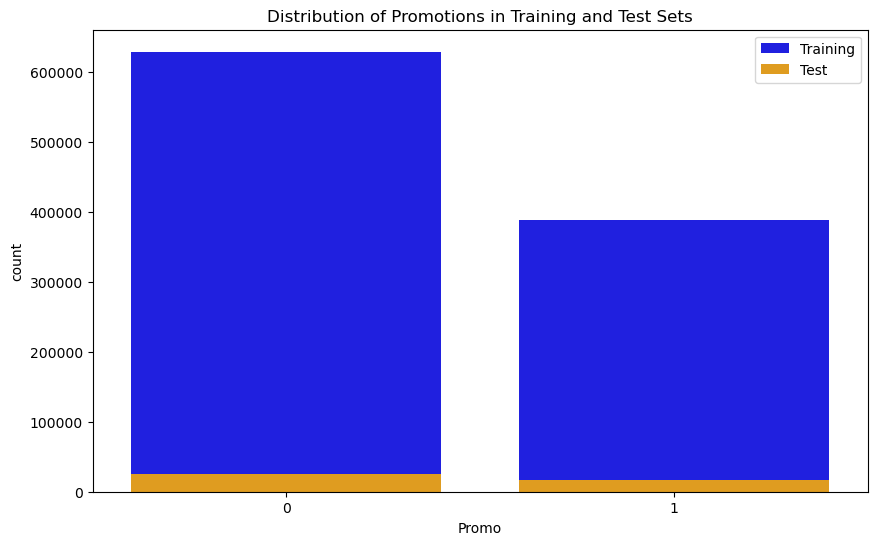

In [5]:
#Distribution of promotions in training and test sets
plt.figure(figsize=(10, 6))
sns.countplot(x='Promo', data=train_data, label='Training', color='blue')
sns.countplot(x='Promo', data=test_data, label='Test', color='orange')
plt.title('Distribution of Promotions in Training and Test Sets')
plt.legend()
plt.show()

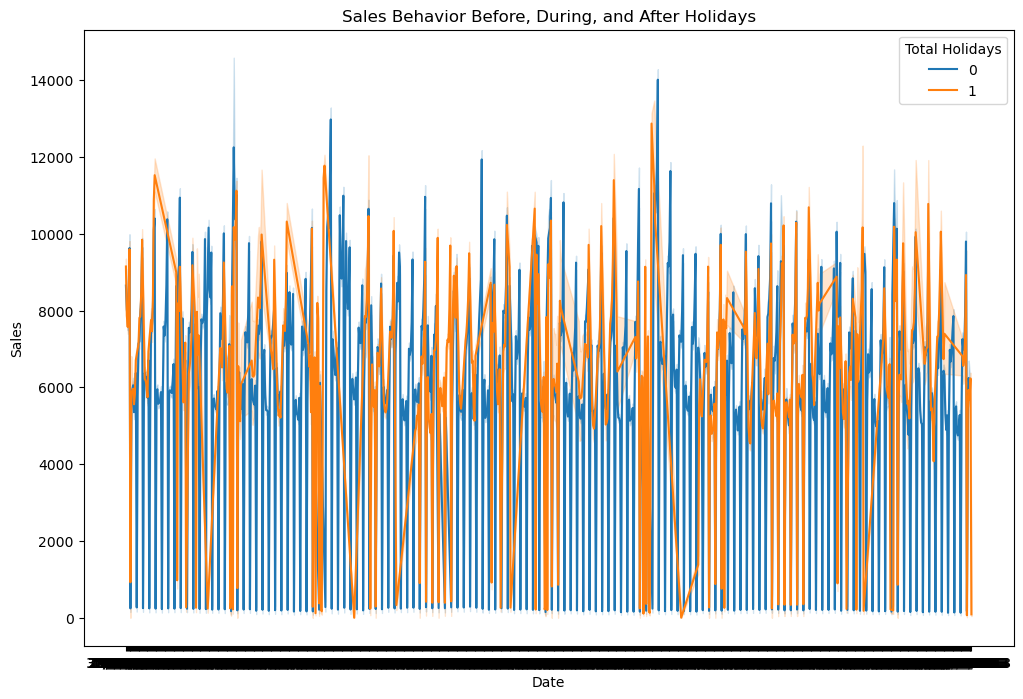

In [6]:
#Sales Behaviour before, during and after holidays
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='Sales', data=train_data, hue='Total Holidays')
plt.title('Sales Behavior Before, During, and After Holidays')
plt.show()

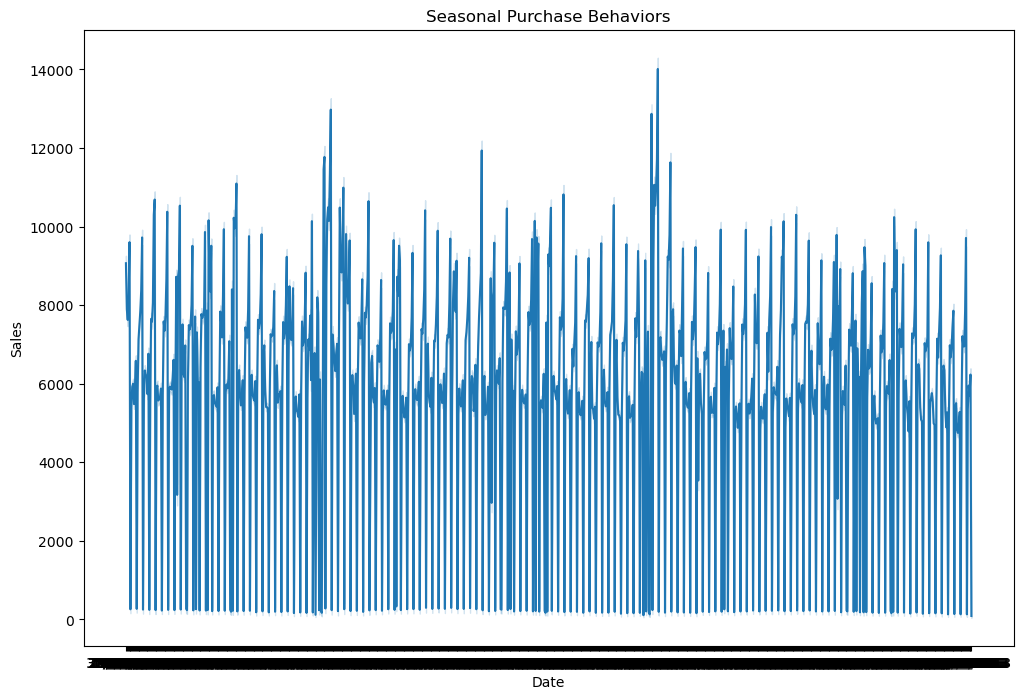

In [7]:
#Seasonal purchase Behaviors
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='Sales', data=train_data, estimator='mean')
plt.title('Seasonal Purchase Behaviors')
plt.show()

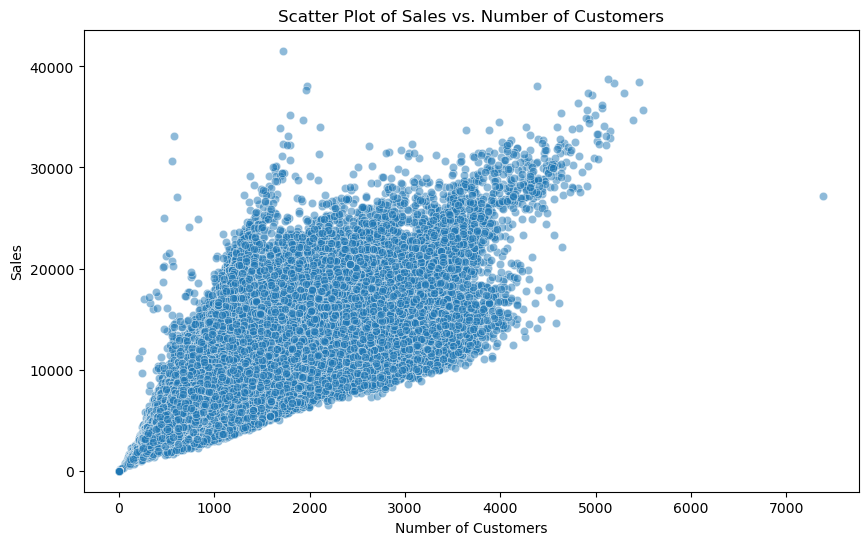

In [8]:
#Correlation between sales and number of customers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customers', y='Sales', data=train_data, alpha=0.5)
plt.title('Scatter Plot of Sales vs. Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

In [9]:
correlation_coefficient = train_data['Sales'].corr(train_data['Customers'])
print(f'Correlation Coefficient: {correlation_coefficient}')

Correlation Coefficient: 0.894710773301698


In [10]:
train_data['Promo'] = train_data['Promo'].astype(bool)

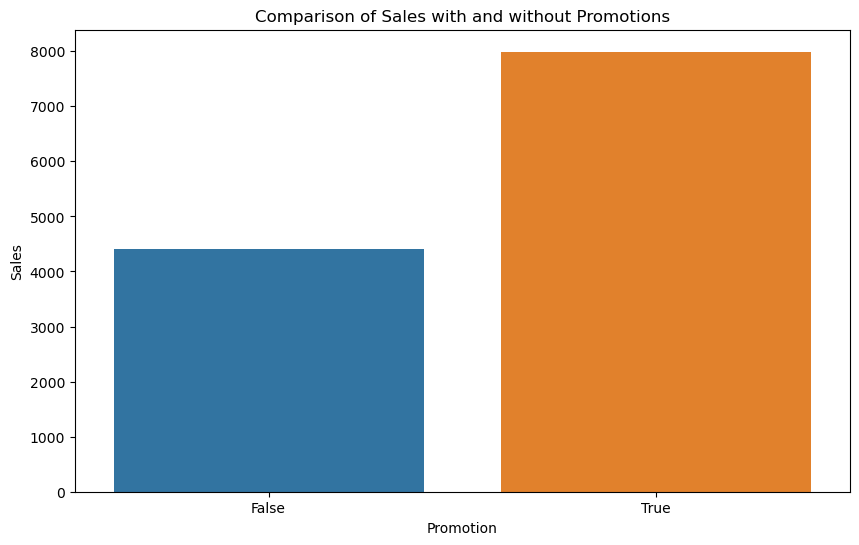

In [11]:
#Comparison of sales with and without promotions to analyse the promo sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Promo', y='Sales', data=train_data, errorbar=None)
plt.title('Comparison of Sales with and without Promotions')
plt.xlabel('Promotion')
plt.ylabel('Sales')
plt.show()

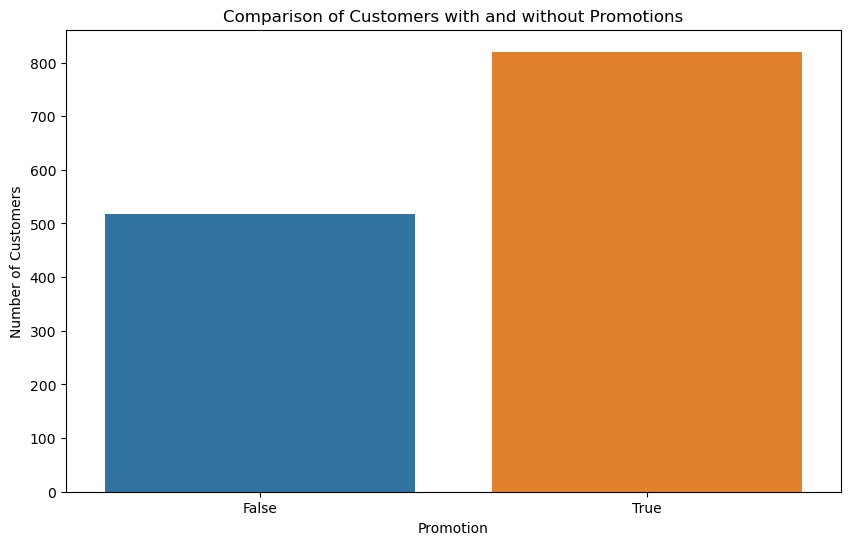

In [12]:
#Comparison of customers with and without promotions to analyse the purchase behaviour of customers
plt.figure(figsize=(10, 6))
sns.barplot(x='Promo', y='Customers', data=train_data, errorbar=None)
plt.title('Comparison of Customers with and without Promotions')
plt.xlabel('Promotion')
plt.ylabel('Number of Customers')
plt.show()

In [13]:
sales_pivot = train_data.pivot_table(index='Store', columns='Promo', values='Sales', aggfunc='mean', fill_value=0)

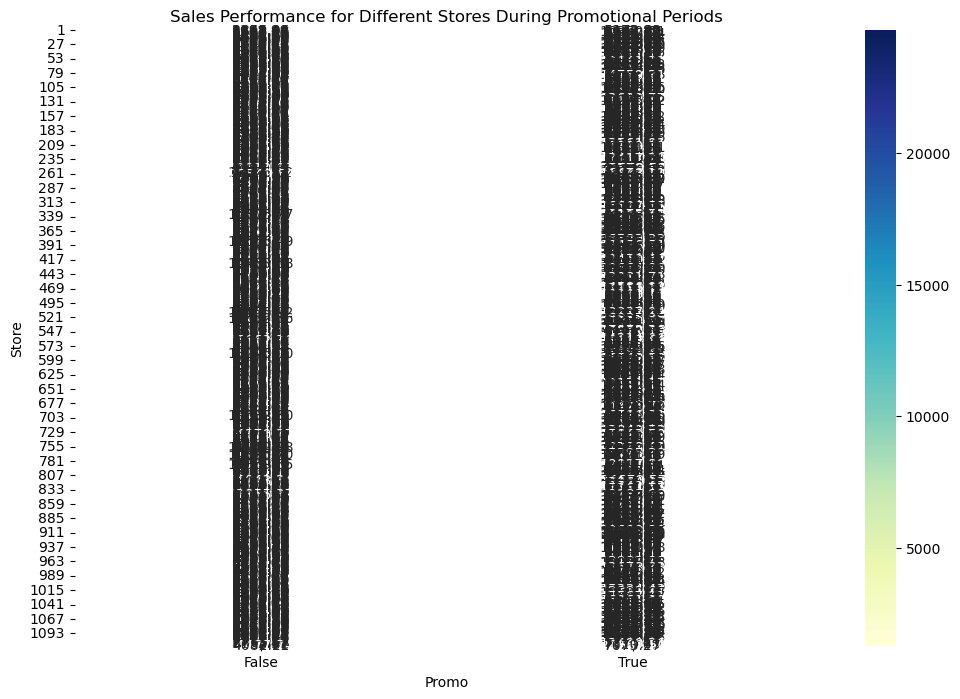

In [14]:
#Sales performance for different stores during the promotional periods
plt.figure(figsize=(12, 8))
sns.heatmap(sales_pivot, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Sales Performance for Different Stores During Promotional Periods')
plt.xlabel('Promo')
plt.ylabel('Store')
plt.show()

In [15]:
train_data['Date'] = pd.to_datetime(train_data['Date'], format='%d/%m/%Y')
open_train_data = train_data[train_data['Open'] == 1].copy()
open_train_data.loc[:, 'Hour'] = open_train_data['Date'].dt.hour

In [16]:
from datetime import datetime

In [17]:
data = pd.read_csv("train.csv",
                   parse_dates=["Date"],dayfirst=True,
                   index_col=["Date"])

In [18]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday A,StateHoliday B,StateHoliday C,SchoolHoliday,Total Holidays
Date,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,0,0,1,1
2015-07-31,2,5,6064,625,1,1,0,0,0,1,1
2015-07-31,3,5,8314,821,1,1,0,0,0,1,1
2015-07-31,4,5,13995,1498,1,1,0,0,0,1,1
2015-07-31,5,5,4822,559,1,1,0,0,0,1,1


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   Store           1017209 non-null  int64
 1   DayOfWeek       1017209 non-null  int64
 2   Sales           1017209 non-null  int64
 3   Customers       1017209 non-null  int64
 4   Open            1017209 non-null  int64
 5   Promo           1017209 non-null  int64
 6   StateHoliday A  1017209 non-null  int64
 7   StateHoliday B  1017209 non-null  int64
 8   StateHoliday C  1017209 non-null  int64
 9   SchoolHoliday   1017209 non-null  int64
 10  Total Holidays  1017209 non-null  int64
dtypes: int64(11)
memory usage: 93.1 MB


In [20]:
len(data)

1017209

In [21]:
daily_sales = data.groupby("Date").sum()

In [22]:
Total_sale = pd.DataFrame({
    "Date": daily_sales.index,
    "Total_Sales": daily_sales.sum(axis=1)})

In [23]:
Total_sale.head()

,Date,Total_Sales
Date,,
2013-01-01,2013-01-01,743495
2013-01-02,2013-01-02,8412760
2013-01-03,2013-01-03,7738679
2013-01-04,2013-01-04,8052024
2013-01-05,2013-01-05,7269256


In [24]:
Total_sale['Date'] = pd.to_datetime(Total_sale['Date'])
Total_sale.set_index('Date', inplace=True)

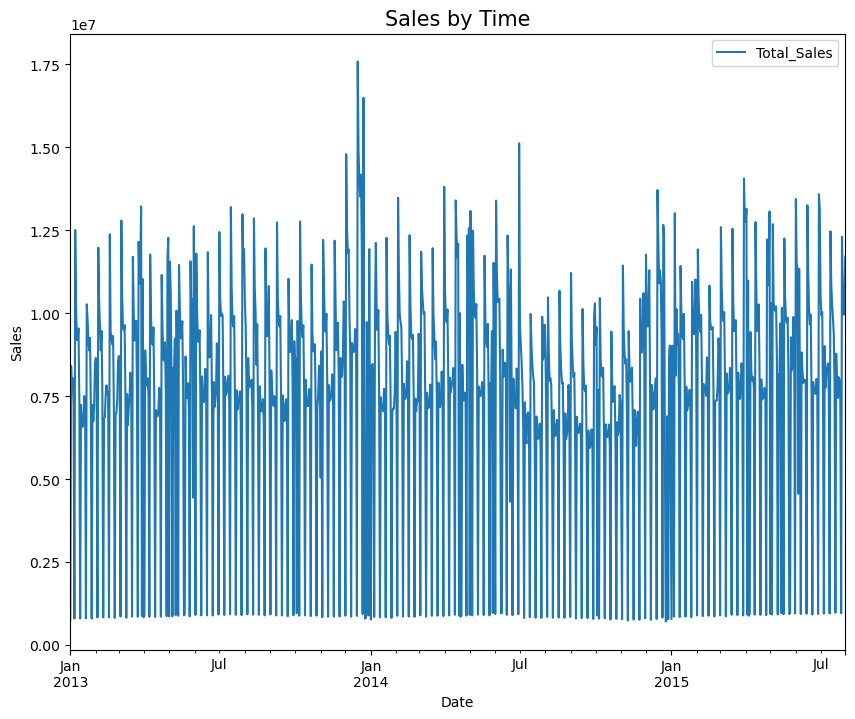

In [25]:
#Avg sales trends during store open Hours
Total_sale.plot(figsize=(10,8))
plt.ylabel("Sales")
plt.title("Sales by Time",fontsize =15)
plt.show()

In [26]:
#Weekend Sales for stores open on all weekdays
train_data['Date'] = pd.to_datetime(train_data['Date'], format='%d/%m/%Y')
train_data['Date'] = pd.to_datetime(train_data['Date'])
weekday_data = train_data[train_data['DayOfWeek'].isin([1, 2, 3, 4, 5])]
weekend_data = train_data[train_data['DayOfWeek'].isin([6, 7])]

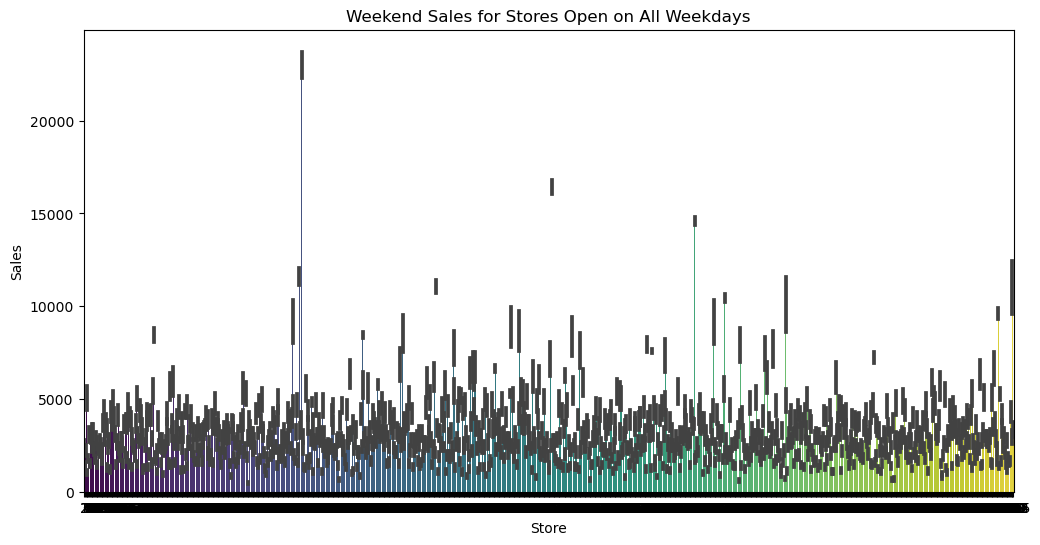

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Sales', data=weekend_data, palette='viridis')
plt.title('Weekend Sales for Stores Open on All Weekdays')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.show()

In [28]:
merged_data = pd.merge(train_data, store_data[['Store', 'Assortment']], on='Store')
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data_sorted = merged_data.sort_values(by=['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 
                               'StateHoliday A', 'StateHoliday B', 'StateHoliday C', 
                               'SchoolHoliday', 'Total Holidays'])

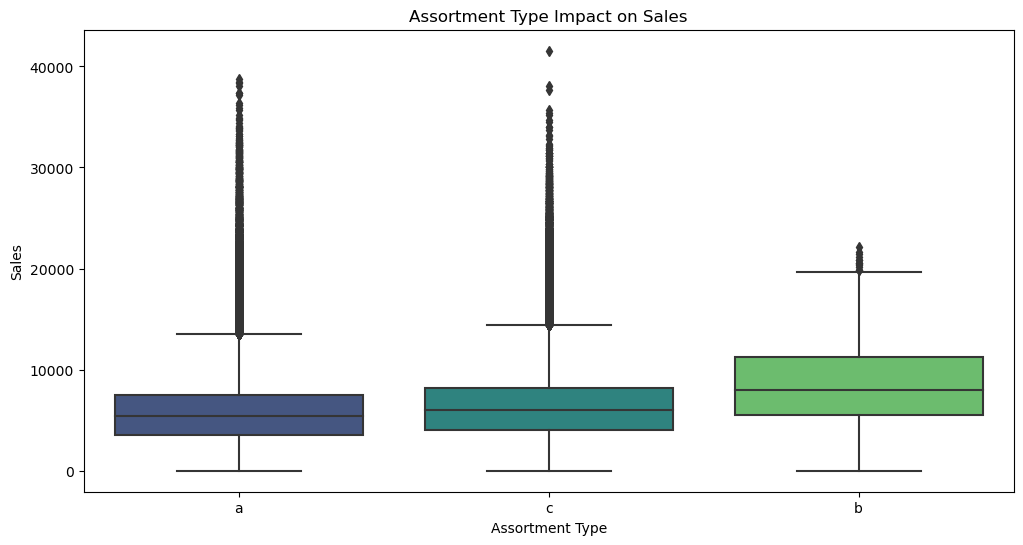

In [29]:
#Assortment Type impact on sales
if 'Assortment' in merged_data_sorted.columns and 'Sales' in merged_data_sorted.columns:
    # Box plot to compare sales across different assortment types
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Assortment', y='Sales', data=merged_data_sorted, palette='viridis')
    plt.title('Assortment Type Impact on Sales')
    plt.xlabel('Assortment Type')
    plt.ylabel('Sales')
    plt.show()
else:
    print("'Assortment' or 'Sales' column not found in the merged DataFrame.")

In [30]:
merged_data = pd.merge(train_data, store_data[['Store', 'CompetitionDistance']], on='Store')

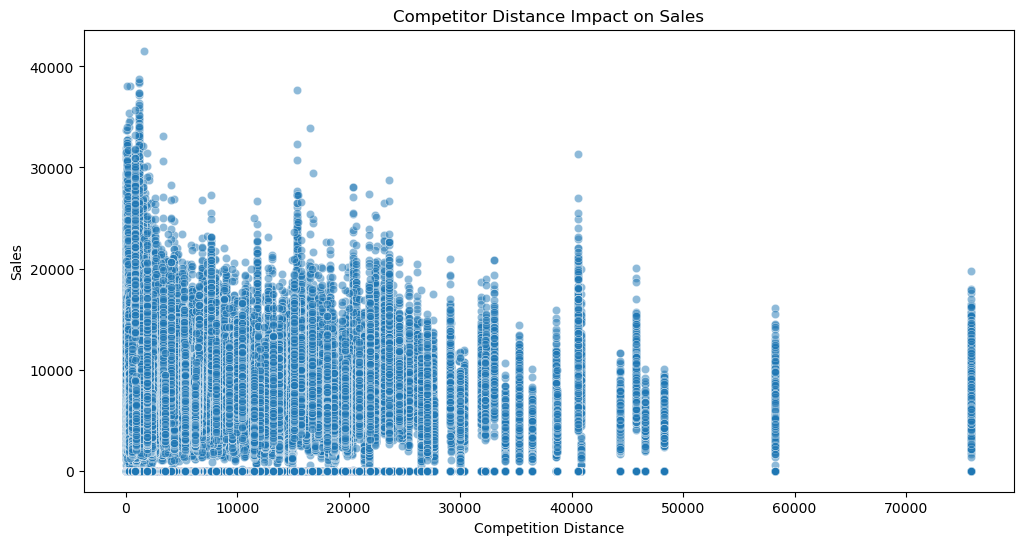

In [31]:
#Competitor distance impact on sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=merged_data, alpha=0.5)
plt.title('Competitor Distance Impact on Sales')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.show()

In [32]:
merged_data = pd.merge(train_data, store_data[['Store', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']], on='Store')
new_competitors_data = merged_data[(merged_data['CompetitionOpenSinceMonth'].notnull()) & (merged_data['CompetitionOpenSinceYear'].notnull())]

C:\Users\admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


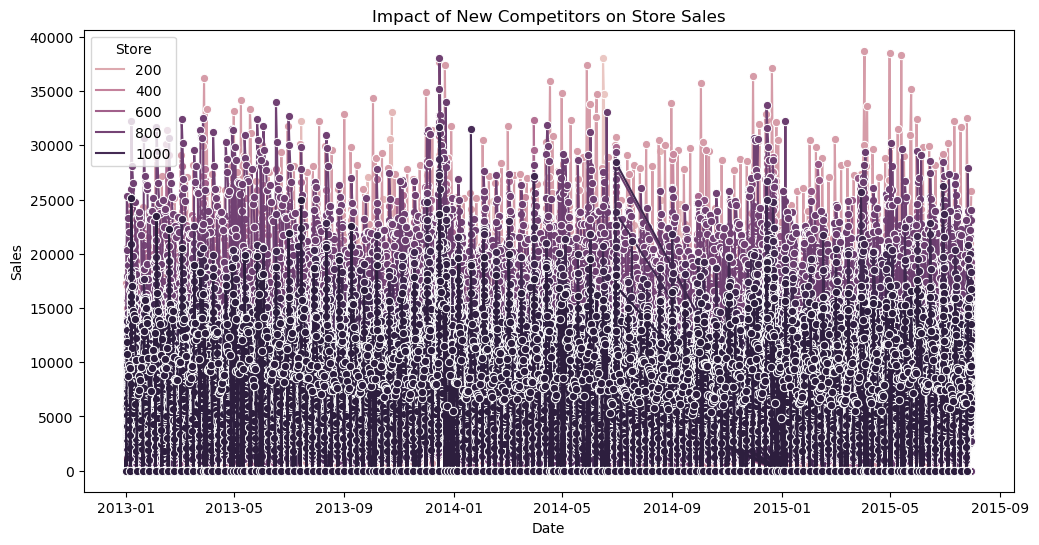

In [33]:
#Impact of new competitor on store sales
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', data=new_competitors_data, hue='Store', marker='o')
plt.title('Impact of New Competitors on Store Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(title='Store')
plt.show()

# 1.2 - Logging

In [34]:
import logging

In [35]:
logging.basicConfig(filename='exploratory_analysis.log', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logging.info('Distribution of Promotions in Training and Test Sets')
logging.info('Sales Behavior Before, During, and After Holidays')
logging.info('Seasonal Purchase Behaviors')
logging.info('Scatter Plot of Sales vs. Number of Customers')
logging.info('Comparison of Sales with and without Promotions')
logging.info('Comparison of Customers with and without Promotions')
logging.info('Sales Performance for Different Stores During Promotional Periods')
logging.info('Average Sales Trends During Store Open Hours')
logging.info('Weekend Sales for Stores Open on All Weekdays')
logging.info('Assortment Type Impact on Sales')
logging.info('Competitor Distance Impact on Sales')
logging.info('Impact of New Competitors on Store Sales')
logging.shutdown()


In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Store           1017209 non-null  int64         
 1   DayOfWeek       1017209 non-null  int64         
 2   Date            1017209 non-null  datetime64[ns]
 3   Sales           1017209 non-null  int64         
 4   Customers       1017209 non-null  int64         
 5   Open            1017209 non-null  int64         
 6   Promo           1017209 non-null  bool          
 7   StateHoliday A  1017209 non-null  int64         
 8   StateHoliday B  1017209 non-null  int64         
 9   StateHoliday C  1017209 non-null  int64         
 10  SchoolHoliday   1017209 non-null  int64         
 11  Total Holidays  1017209 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(10)
memory usage: 86.3 MB


In [37]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [38]:
store_data.fillna(0, inplace=True)

In [39]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


# Task 2 - Prediction of store sales
#2.1 Preprocessing

In [40]:
from sklearn.preprocessing import StandardScaler 

In [41]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['Total Holidays'] = pd.to_datetime(train_data['Total Holidays'])
train_data['Month'] = train_data['Date'].dt.month
train_data['Day'] = train_data['Date'].dt.day
train_data['Year'] = train_data['Date'].dt.year

In [42]:
train_data['Weekend'] = train_data['DayOfWeek'].isin([6, 7])
train_data['DaysToHoliday'] = (train_data['Date'] - train_data['Total Holidays']).dt.days
train_data['DaysAfterHoliday'] = (train_data['Date'] - train_data['Total Holidays']).dt.days.clip(lower=0)

In [43]:
train_data['BeginningOfMonth'] = train_data['Date'].dt.is_month_start
train_data['MidOfMonth'] = train_data['Date'].dt.day == 15
train_data['EndOfMonth'] = train_data['Date'].dt.is_month_end

In [44]:
train_data = train_data.drop(['Total Holidays'], axis=1)

In [45]:
train_data['Total Holidays'] = train_data['StateHoliday A']+ train_data['StateHoliday B']+ train_data['StateHoliday C']+ train_data['SchoolHoliday']

In [46]:
print(train_data.head())

   Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday A  \
0      1          5 2015-07-31   5263        555     1   True               0   
1      2          5 2015-07-31   6064        625     1   True               0   
2      3          5 2015-07-31   8314        821     1   True               0   
3      4          5 2015-07-31  13995       1498     1   True               0   
4      5          5 2015-07-31   4822        559     1   True               0   

   StateHoliday B  StateHoliday C  ...  Month  Day  Year  Weekend  \
0               0               0  ...      7   31  2015    False   
1               0               0  ...      7   31  2015    False   
2               0               0  ...      7   31  2015    False   
3               0               0  ...      7   31  2015    False   
4               0               0  ...      7   31  2015    False   

   DaysToHoliday  DaysAfterHoliday  BeginningOfMonth  MidOfMonth  EndOfMonth  \
0          16646  

In [47]:
yearly_sales = train_data.groupby('Year')['Sales'].agg(['sum', 'mean']).reset_index()
yearly_sales.columns = ['Year', 'Total Sales', 'Average Sales']
print(yearly_sales)

   Year  Total Sales  Average Sales
0  2013   2302876084    5658.533675
1  2014   2180804896    5833.290704
2  2015   1389499643    5878.245380


In [48]:
yearly_store_sales = train_data.groupby(['Year', 'Store'])['Sales'].agg(['sum', 'mean']).reset_index()
yearly_store_sales.columns = ['Year', 'Store', 'Total Sales', 'Average Sales']
print(yearly_store_sales)

      Year  Store  Total Sales  Average Sales
0     2013      1      1491140    4085.315068
1     2013      2      1488164    4077.161644
2     2013      3      2128265    5830.863014
3     2013      4      2852667    7815.526027
4     2013      5      1420228    3891.035616
...    ...    ...          ...            ...
3340  2015   1111       858869    4051.268868
3341  2015   1112      1614029    7613.344340
3342  2015   1113      1164107    5491.070755
3343  2015   1114      3809075   17967.334906
3344  2015   1115      1242048    5858.716981

[3345 rows x 4 columns]


In [49]:
train_data['QuarterOfYear'] = train_data['Date'].dt.quarter
train_data['Quarter'] = train_data['QuarterOfYear'].map({1: 'Q1', 2: 'Q2', 3: 'Q3'})
print(train_data[['Date', 'Quarter']])

              Date Quarter
0       2015-07-31      Q3
1       2015-07-31      Q3
2       2015-07-31      Q3
3       2015-07-31      Q3
4       2015-07-31      Q3
...            ...     ...
1017204 2013-01-01      Q1
1017205 2013-01-01      Q1
1017206 2013-01-01      Q1
1017207 2013-01-01      Q1
1017208 2013-01-01      Q1

[1017209 rows x 2 columns]


In [50]:
print(train_data)

         Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1   True   
1            2          5 2015-07-31   6064        625     1   True   
2            3          5 2015-07-31   8314        821     1   True   
3            4          5 2015-07-31  13995       1498     1   True   
4            5          5 2015-07-31   4822        559     1   True   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1111          2 2013-01-01      0          0     0  False   
1017205   1112          2 2013-01-01      0          0     0  False   
1017206   1113          2 2013-01-01      0          0     0  False   
1017207   1114          2 2013-01-01      0          0     0  False   
1017208   1115          2 2013-01-01      0          0     0  False   

         StateHoliday A  StateHoliday B  StateHoliday C  ...  Year  Weekend  \
0                     0               0               0  ...  2015  

In [51]:
monthly_sales = train_data.groupby('Month')['Sales'].sum().reset_index()
train_data = pd.merge(train_data, monthly_sales, on='Month', how='left', suffixes=('', '_MonthTotal'))
monthly_sales_storewise = train_data.groupby(['Year', 'Month', 'Store'])['Sales'].sum().reset_index()
train_data = pd.merge(train_data, monthly_sales_storewise, on=['Year', 'Month', 'Store'], how='left', suffixes=('', '_MonthTotal_StoreTotal'))
print(train_data)

         Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1   True   
1            2          5 2015-07-31   6064        625     1   True   
2            3          5 2015-07-31   8314        821     1   True   
3            4          5 2015-07-31  13995       1498     1   True   
4            5          5 2015-07-31   4822        559     1   True   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1111          2 2013-01-01      0          0     0  False   
1017205   1112          2 2013-01-01      0          0     0  False   
1017206   1113          2 2013-01-01      0          0     0  False   
1017207   1114          2 2013-01-01      0          0     0  False   
1017208   1115          2 2013-01-01      0          0     0  False   

         StateHoliday A  StateHoliday B  StateHoliday C  ...  DaysToHoliday  \
0                     0               0               0  ...        

In [52]:
train_data = pd.merge(train_data, store_data, on='Store', how='left')

In [53]:
print(train_data.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday A', 'StateHoliday B', 'StateHoliday C', 'SchoolHoliday',
       'Month', 'Day', 'Year', 'Weekend', 'DaysToHoliday', 'DaysAfterHoliday',
       'BeginningOfMonth', 'MidOfMonth', 'EndOfMonth', 'Total Holidays',
       'QuarterOfYear', 'Quarter', 'Sales_MonthTotal',
       'Sales_MonthTotal_StoreTotal', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [54]:
selected_columns = ['StoreType', 'Assortment', 'CompetitionDistance', 
                    'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 
                    'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval','Sales','Sales_MonthTotal_StoreTotal']
sales_data_with_store_details = pd.concat([train_data[selected_columns], 
                                           pd.get_dummies(train_data[['StoreType', 'Assortment', 'PromoInterval']])], axis=1)
print(sales_data_with_store_details.columns)

Index(['StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Sales',
       'Sales_MonthTotal_StoreTotal', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')


In [55]:
#2.2 Building models with sklearn pipelines
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42)) 
])

In [56]:
#2.3 Choose a loss function
def custom_loss(y_true, y_pred):
    squared_errors = (y_true - y_pred) ** 2
    return np.mean(squared_errors)

from sklearn.metrics import mean_squared_error

In [57]:
#2.4 Post Prediction analysis
X = sales_data_with_store_details[['CompetitionDistance', 
                                   'CompetitionOpenSinceMonth', 
                                   'CompetitionOpenSinceYear', 
                                   'Promo2', 
                                   'Promo2SinceWeek', 
                                   'Promo2SinceYear']]
y = sales_data_with_store_details['Sales_MonthTotal_StoreTotal']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
feature_importance = pipeline.named_steps['model'].feature_importances_

In [58]:
print("Feature Importance:")
for feature, importance in zip(selected_columns, feature_importance):
    print(f"{feature}: {importance}")

Feature Importance:
StoreType: 0.5485517830505974
Assortment: 0.1770528668872332
CompetitionDistance: 0.1605676459098386
CompetitionOpenSinceMonth: 0.003294323195496011
CompetitionOpenSinceYear: 0.05347755821939657
Promo2: 0.057055822737438214


In [59]:
import pickle
import datetime

In [60]:
# 2.5 Serialize models
timestamp = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
filename = f"model_{timestamp}.pkl"
with open(filename, 'wb') as file:
    pickle.dump(pipeline, file)

In [61]:
#2.6 Building model with deep learning
n_lags = 30
selected_features = ['StoreType', 'Assortment', 'CompetitionDistance', 
                    'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 
                    'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
target_variable = 'Sales_MonthTotal_StoreTotal'
lagged_features = sales_data_with_store_details[selected_features].shift(n_lags)
target_variable_shifted = sales_data_with_store_details[target_variable].shift(-n_lags)
supervised_data = pd.concat([lagged_features, target_variable_shifted], axis=1)
supervised_data.dropna(inplace=True)
print(supervised_data.head())

   StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
30         c          a               1270.0                        9.0   
31         a          a                570.0                       11.0   
32         a          a              14130.0                       12.0   
33         c          c                620.0                        9.0   
34         a          a              29910.0                        4.0   

    CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
30                    2008.0     0.0              0.0              0.0   
31                    2007.0     1.0             13.0           2010.0   
32                    2006.0     1.0             14.0           2011.0   
33                    2009.0     0.0              0.0              0.0   
34                    2015.0     0.0              0.0              0.0   

      PromoInterval  Sales_MonthTotal_StoreTotal  
30                0                     146156.0  
31

In [62]:
numerical_data = supervised_data.drop(['StoreType', 'Assortment', 'PromoInterval'], axis=1)
categorical_data = pd.get_dummies(supervised_data[['StoreType', 'Assortment', 'PromoInterval']])
encoded_data = pd.concat([numerical_data, categorical_data], axis=1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(encoded_data)
scaled_data_df = pd.DataFrame(scaled_data, columns=encoded_data.columns)

In [63]:
from sklearn.model_selection import train_test_split
X = scaled_data_df.drop(columns=[target_variable])
y = scaled_data_df[target_variable]

In [64]:
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import LSTM, Dense, Dropout
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    LSTM(units=50),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_reshaped, y_train, epochs=15, batch_size=32, verbose=1)
mse = model.evaluate(X_test_reshaped, y_test)
print("Mean Squared Error:", mse)
predictions = model.predict(X_test_reshaped)

Epoch 1/15
25429/25429 [==============================] - 96s 4ms/step - loss: 0.0072
Epoch 2/15
25429/25429 [==============================] - 95s 4ms/step - loss: 0.0065
Epoch 3/15
25429/25429 [==============================] - 99s 4ms/step - loss: 0.0061
Epoch 4/15
25429/25429 [==============================] - 99s 4ms/step - loss: 0.0058
Epoch 5/15
25429/25429 [==============================] - 99s 4ms/step - loss: 0.0055
Epoch 6/15
25429/25429 [==============================] - 103s 4ms/step - loss: 0.0052
Epoch 7/15
25429/25429 [==============================] - 99s 4ms/step - loss: 0.0050
Epoch 8/15
25429/25429 [==============================] - 103s 4ms/step - loss: 0.0049
Epoch 9/15
25429/25429 [==============================] - 100s 4ms/step - loss: 0.0047
Epoch 10/15
25429/25429 [==============================] - 104s 4ms/step - loss: 0.0046
Epoch 11/15
25429/25429 [==============================] - 101s 4ms/step - loss: 0.0045
Epoch 12/15
25429/25429 [======================

6358/6358 [==============================] - 11s 2ms/step


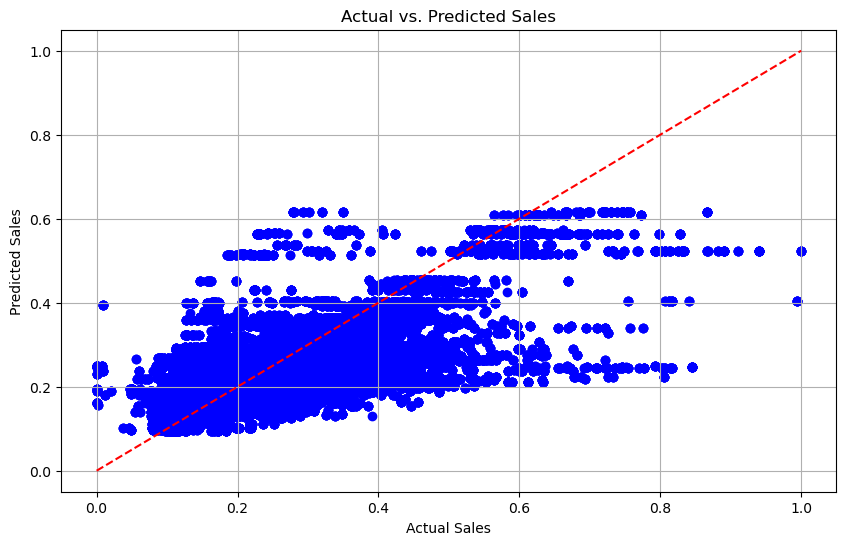

In [65]:
y_pred = model.predict(X_test_reshaped)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.grid(True)
plt.show()

In [69]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [92]:
import mlflow.tensorflow

with mlflow.start_run():
    mlflow.log_param("Feature","Feature")
    mlflow.log_param("Target","Target")
    mlflow.sklearn.log_model(model, "linear_regression_model")
mlflow.sklearn.log_model(model,"linear_regression_model_local")
mlflow.end_run()